# Preprocesamiento de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de archivos

In [2]:
df_a = pd.read_csv('201411.csv')
df_b = pd.read_csv('201421.csv')

### Preprocesamiento

#### a) Agregar los registros duplicados a una tabla llamada "verificaciones_duplicadas".

Nota: Para identificar los duplicados se ocupará la columna "CertificadoId"

In [3]:
verificaciones_duplicadas_a = df_a[df_a.duplicated(['CertificadoId'])]

In [4]:
verificaciones_duplicadas_b = df_b[df_b.duplicated(['CertificadoId'])]

In [5]:
df_a.rename(columns = {'troId':'Linea'}, inplace = True)

#### b) Agregar los registros sucios en una tabla llamada "verificaciones_con_ruido".

In [6]:
#Modelos únicos
modelos_a = df_a['Modelo'].unique()

In [7]:
modelos_b = df_b['Modelo'].unique()

In [8]:
df_a['Modelo'] = df_a['Modelo'].map(str)
idx_a = df_a['Modelo'].str.len() != 4
verificaciones_con_ruido_a = df_a.loc[idx_a]

In [9]:
idx_b = df_b['Modelo'].str.len() != 4
verificaciones_con_ruido_b = df_b.loc[idx_b]

#### c) Hacer la integración de los archivos 201411.csv y 201421.csv en una sola tabla llamada "verificaciones_completa".

In [10]:
verificaciones_completa = pd.concat([df_a, df_b], axis=0, sort = False)
verificaciones_completa.shape

(4314251, 12)

#### d) Realizar la limpieza necesaria para corregir datos con ruido, por ejemplo el año.

In [11]:
#Verificación de inexistencia de datos nulos 
verificaciones_completa.isnull().sum()

Placa             0
VIN               0
Marca             0
Submarca          0
Modelo            0
CertificadoId     0
VerificentroId    0
Linea             0
Fecha             0
Hora              0
Resultado         0
CausaRechazo      0
dtype: int64

In [12]:
#Duplicaciones
#verificaciones_duplicadas = df_a[df_a.duplicated(['CertificadoId'])]
verificaciones_completa[verificaciones_completa.duplicated(['CertificadoId'])]

,Placa,VIN,Marca,Submarca,Modelo,CertificadoId,VerificentroId,Linea,Fecha,Hora,Resultado,CausaRechazo
500014,111RAF,YV1RS53KX22096314,VOLVO,VOLVO_S60_2.0T,2002,102184101,9074,4,2014/02/19,14:36:07,DOS,DESCONOCIDO
502964,990SBX,3C3B146B9NT271322,DESCONOCIDO,DESCONOCIDO,1992,102715885,9042,5,2014/05/10,11:07:47,DOS,DESCONOCIDO
530078,888RXY,9BMMF33E4YA010530,MERCEDES BENZ,A160,2000,102301749,9007,5,2014/03/06,17:14:29,DOS,DESCONOCIDO
596116,REU1666,9BFBT08N258354682,FORD,FIESTA,2005,102664565,9032,6,2014/05/02,15:34:25,DOS,DESCONOCIDO
654318,A36529,8AWJC09E76A714598,VW,DERBY_2.0,2006,102610860,9050,4,2014/05/06,17:44:26,DOS,DESCONOCIDO
...,...,...,...,...,...,...,...,...,...,...,...,...
2235354,595XYS,9BWDB45U5CT086123,VW,GOL_1.6,2012,103224538,9024,1,2014/08/26,13:03:15,CERO,DESCONOCIDO
2235355,828XZC,3VW1V09M7CM029618,VW,CLASICO_2.0,2012,103262711,9023,5,2014/09/13,08:55:50,CERO,DESCONOCIDO
2235356,861XYS,3G1TC5CF5CL107689,GENERAL MOTORS,AVEO,2012,103689683,9023,5,2014/11/18,12:05:47,CERO,DESCONOCIDO
2235357,496YAB,3C4BDCAB4CT173381,CHRYSLER-DODGE,JOURNEY,2012,103180757,9023,4,2014/08/21,09:24:54,CERO,DESCONOCIDO


In [13]:
#Corrección de año
idx = verificaciones_completa['Modelo'].str.len() == 4
verificaciones_completa = verificaciones_completa.loc[idx]
verificaciones_completa.shape

(4300554, 12)

In [14]:
#Unificación de columna resultado
verificaciones_completa['Resultado'].unique()

array(['  CERO       ', '  RECHAZO    ', '  DOBLE CERO ', '  DOS        ',
       '  DESCONOCIDO', '  CERO     ', '  DOS      ', '  RECHAZO  ',
       '  DOBLE CERO'], dtype=object)

In [15]:
verificaciones_completa['Resultado'] = verificaciones_completa['Resultado'].replace(
        ['  CERO       ', '  CERO     ', '  RECHAZO    ', '  RECHAZO  ', '  DOBLE CERO ', '  DOBLE CERO', '  DOS        ','  DOS      ', '  DESCONOCIDO'],
    
        ['CERO', 'CERO', 'RECHAZO', 'RECHAZO', 'DOBLE CERO', 'DOBLE CERO', 'DOS', 'DOS', 'DESCONOCIDO'])

In [16]:
verificaciones_completa['Resultado'].unique()

array(['CERO', 'RECHAZO', 'DOBLE CERO', 'DOS', 'DESCONOCIDO'],
      dtype=object)

In [17]:
verificaciones_completa.to_csv('verificaciones_completa.csv', index=False)

### Extracción de información

In [18]:
verificaciones_completa.head()

,Placa,VIN,Marca,Submarca,Modelo,CertificadoId,VerificentroId,Linea,Fecha,Hora,Resultado,CausaRechazo
0,906VAN,WBAPC91027WD88073,BMW,X3_3.0_SI,2007,100063581,9019,1,2014/01/23,09:02:53,CERO,DESCONOCIDO
1,214UYK,1FMCU04138KA41531,FORD,ESCAPE_4X4,2008,100455822,9029,3,2014/04/08,09:17:40,CERO,DESCONOCIDO
2,941VKC,WBAFE41098LZ82376,BMW,X3_3.0_SI,2008,100636175,9002,6,2014/05/14,15:48:50,CERO,DESCONOCIDO
3,833WDT,KMHCN41C08U225078,CHRYSLER-DODGE,ATTITUDE,2008,100402938,9014,4,2014/04/05,14:32:21,CERO,DESCONOCIDO
4,520WSK,93YL61JS99J052638,NISSAN,APRIO,2009,100825459,9007,8,2014/06/27,10:58:39,CERO,DESCONOCIDO


#### ¿Cuántos vehículos hay por modelo?

In [19]:
#Cantidad por modelo
bb = verificaciones_completa['Modelo'].value_counts()
bb = bb.sort_values(ascending=False).to_frame().reset_index()
bb.columns = ['Modelo', 'Count']
bb

,Modelo,Count
0,2007,332825
1,2008,326234
2,2005,299131
3,2006,280156
4,2011,276062
...,...,...
75,1931,2
76,1932,2
77,1934,2
78,1928,2


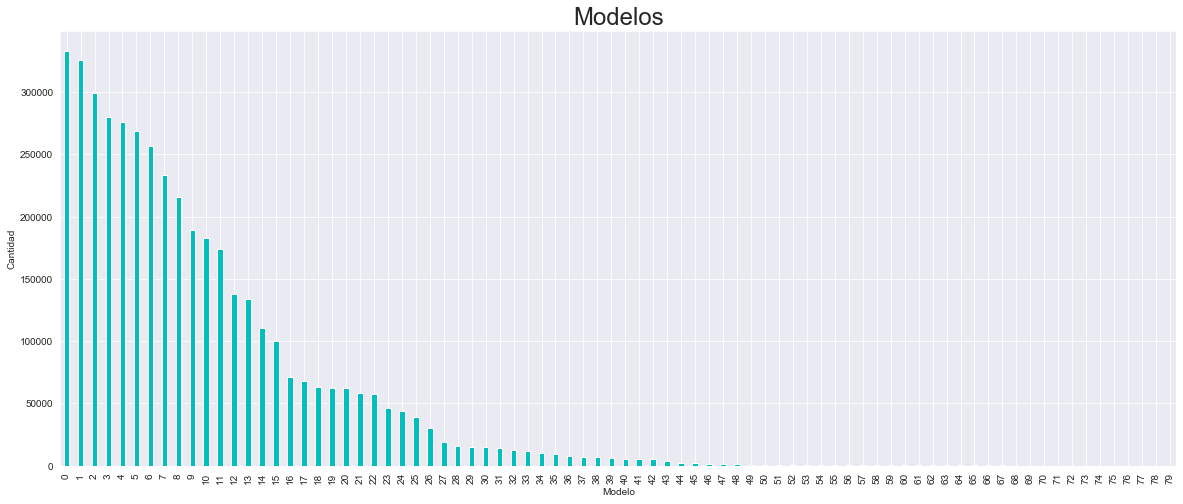

In [45]:
ax = bb.plot(kind="bar", color='c', figsize=(20,8), width=0.4, legend = False)
plt.title('Modelos', size = 24)
ax.set_xlabel('Modelo')
ax.set_ylabel('Cantidad')
plt.show()

In [21]:
#Total registros por resultado
res = verificaciones_completa['Resultado'].unique()
print(verificaciones_completa['Resultado'].value_counts())

CERO           1702336
DOS            1189896
DESCONOCIDO     649146
RECHAZO         569858
DOBLE CERO      189318
Name: Resultado, dtype: int64


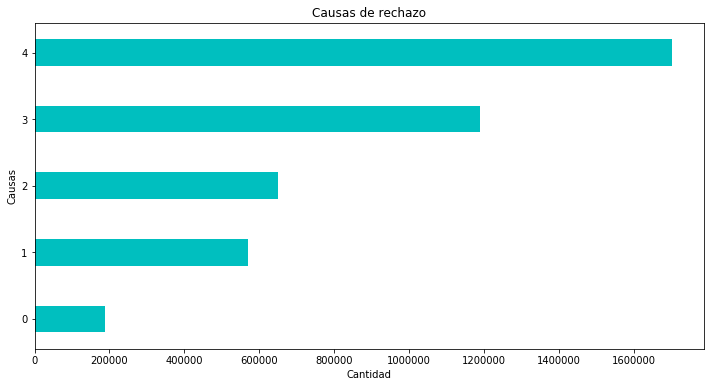

In [22]:
res = verificaciones_completa['Resultado'].value_counts()
res = res.sort_values(ascending=True).to_frame().reset_index()
res.columns = ['Resultado', 'Count']

ax = res.plot(kind="barh", color='c', figsize=(12,6), width=0.4, legend = False)
plt.title('Causas de rechazo')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Causas')
plt.show()

##### 1. ¿Cuántos registros tiene la base de datos?

In [23]:
print('La base de datos tiene', verificaciones_completa.shape[0], 'registros.')

La base de datos tiene 4300554 registros.


##### 2. ¿Cuántos vehículos existen en la base de datos?

In [24]:
print('Existen', len(verificaciones_completa['VIN'].unique()), 'vehículos en la base de datos.')

Existen 2177805 vehículos en la base de datos.


##### 3. ¿Cuántos verificentros se tienen registrados en la BD?

In [25]:
print('Hay', len(verificaciones_completa['VerificentroId'].unique()), 
      'verificentros registrados en la base de datos.')

Hay 82 verificentros registrados en la base de datos.


##### 4. ¿Cuántas marcas se tienen?

In [26]:
print('Hay', len(verificaciones_completa['Marca'].unique()), 'marcas registradas en la base de datos.')

Hay 165 marcas registradas en la base de datos.


##### 5. ¿Cuántas  días aparecen?

In [27]:
print('Aparecen', len(verificaciones_completa['Fecha'].unique()), 'días en la base de datos.')

Aparecen 313 días en la base de datos.


##### 6. ¿Cuántos meses hay?

In [28]:
verificaciones_completa['Mes'] = pd.to_datetime(verificaciones_completa['Fecha']).dt.month
print('Hay', len(verificaciones_completa['Mes'].unique()), 'meses en la base de datos.')

Hay 12 meses en la base de datos.


##### 7. ¿Qué resultados hay?

In [29]:
print('Los resultados posibles que hay son: ', verificaciones_completa['Resultado'].unique())

Los resultados posibles que hay son:  ['CERO' 'RECHAZO' 'DOBLE CERO' 'DOS' 'DESCONOCIDO']


##### 8. ¿Cuales son los tipos de causa rechazo presentes?

In [30]:
print('Los tipos de causa de rechazo presentes son: ', verificaciones_completa['CausaRechazo'].unique())

Los tipos de causa de rechazo presentes son:  [' DESCONOCIDO' ' DILUCION DURANTE LA PRUEBA DE EMISIONES'
 ' VALOR DE EMISIONES FUERA DE TOLERANCIAS'
 ' PRESENCIA DE HUMO DURANTE LA PRUEBA' ' INSPECCION VISUAL NO SUPERADA'
 ' CONVERTIDOR CATALITICO NO FUNCIONAL'
 ' VALOR LAMBDA FUERA DE TOLERANCIAS' ' BHP,KMH,RPM, EXCLUSIONES MAXIMAS'
 ' PRUEBA DE EVALUACION TECNICA' ' NO LOGRO ESTABILIZACION DE RPM'
 '   DESCONOCIDO' '   DILUCION DURANTE LA PRUEBA DE EMISIONES'
 '   PRESENCIA DE HUMO DURANTE LA PRUEBA' 'DESCONOCIDO'
 '   INSPECCION VISUAL NO SUPERADA' '   BHP,KMH,RPM, EXCLUSIONES MAXIMAS'
 '   VALOR DE EMISIONES FUERA DE TOLERANCIAS'
 '   VALOR LAMBDA FUERA DE TOLERANCIAS'
 '   CONVERTIDOR CATALITICO NO FUNCIONAL'
 '   PRUEBA DE EVALUACION TECNICA' 'DO PRUEBA DE EVALUACION TECNICA'
 '   NO LOGRO ESTABILIZACION DE RPM' 'O  PRUEBA DE EVALUACION TECNICA']


##### 9. ¿Cuál es el vehículo mas viejo y el más nuevo?

In [31]:
print('El modelo de vehículo más viejo es:', min(verificaciones_completa['Modelo'].map(int)))
print('El modelo de vehículo más nuevo es:', max(verificaciones_completa['Modelo'].map(int)))

El modelo de vehículo más viejo es: 1900
El modelo de vehículo más nuevo es: 2015


##### 10. ¿Cuál es la submarca del vehículo  mas presente en la base de datos?

In [32]:
print('La submarca de vehículo más presente en la base de datos es: ', verificaciones_completa['Submarca'].value_counts().index.tolist()[0])

La submarca de vehículo más presente en la base de datos es:                  TSURU                    


##### 11. ¿Cual es el horario promedio del verificentro que más recibe vehículos ?

In [33]:
#VerificentroID con más vehículos
ID_max = verificaciones_completa['VerificentroId'].value_counts().index.tolist()[0]
ID_max_set = verificaciones_completa.loc[verificaciones_completa['VerificentroId'] == ID_max].reset_index(drop=True)

In [34]:
ID_max_set['Hora'] = ID_max_set['Hora'].replace(" ", "")
ID_max_set['Hora'] = ID_max_set['Hora'].str.strip()

In [35]:
ID_max_set['Hora'] = pd.to_datetime(ID_max_set['Hora'], format='%H:%M:%S').dt.time

In [36]:
print('La hora con mayor visitas en el verificentro que recibe más vehículos es:', ID_max_set['Hora'].value_counts().index.tolist()[0])

La hora con mayor visitas en el verificentro que recibe más vehículos es: 10:26:00


In [37]:
#Función para el promedio de horario
import datetime
def mean_time(l):
    new_list = np.array([3600*time.hour + 60*time.minute + time.second for time in l])
    mean_sec = new_list.mean()
    mean = str(datetime.timedelta(seconds=mean_sec))
    mean = mean.split(":")
    return datetime.time(int(mean[0]),int(mean[1]), int(float(mean[2])))

In [38]:
lista_horas = list(ID_max_set['Hora'].values)
prom_hora = mean_time(lista_horas)
print('El horario promedio del verificentro que recibe más vehículos es:', prom_hora)

El horario promedio del verificentro que recibe más vehículos es: 13:39:36


##### 12. ¿Cuántos registros por cada resultado se tienen?

In [39]:
print('Se tienen los siguientes registros por cada resultado: ', verificaciones_completa['Resultado'].value_counts())

Se tienen los siguientes registros por cada resultado:  CERO           1702336
DOS            1189896
DESCONOCIDO     649146
RECHAZO         569858
DOBLE CERO      189318
Name: Resultado, dtype: int64


##### 13. ¿Qué vehículo  fue el que tuvo más rechazos?

In [40]:
print('El vehículo con más rechazos es: ', verificaciones_completa['VIN'].value_counts().index.tolist()[0])

El vehículo con más rechazos es:     3GCHP42X4NM207415 


##### 14. ¿Cuántos registros duplicados se encontraron?

In [41]:
print('Se encontraron', verificaciones_completa[verificaciones_completa.duplicated(['CertificadoId'])].shape[0], 'registros duplicados.')

Se encontraron 2189 registros duplicados.


## Visualizaciones con cubos

#### Cubo VerificentroxHoraProm

In [42]:
new_df = pd.read_csv('VerificentroxHoraProm.csv')

In [43]:
def VerifxHora(verif_ID):
    aa = new_df[new_df['VerificentroId'] == verif_ID].sort_values(by=['Hora'])
    sns.set_style('darkgrid')
    g = sns.catplot(x='Hora', y='avg(Conteo)', kind='bar', data=aa, color = 'c')
    g.set(xlabel="Hora", ylabel="Promedio de autos")

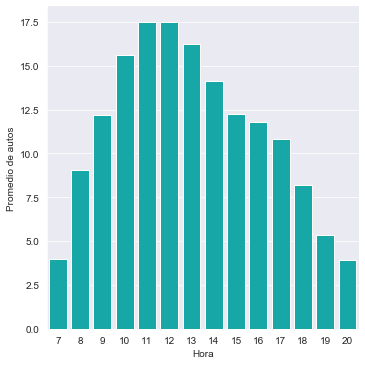

In [44]:
#Seleccionas el ID del verificentro a consultar:
import seaborn as sns
VerifxHora(9005)